# Introduction

The Quantum Fourier Transform (QFT) is a fundamental quantum operation that plays a key role in many quantum algorithms. The QFT is the quantum analogue of the classical Discrete Fourier Transform (DFT), which is used in many classical signal processing applications such as audio and image compression.

In the context of quantum computing, the QFT is used in a variety of algorithms, such as Shor's algorithm for factoring large numbers and the Hidden Subgroup Problem algorithm. It is also used in quantum simulations, quantum error correction, and quantum machine learning.

The QFT can be implemented using a combination of Hadamard gates and controlled-phase gates. However, the circuit for the QFT can become quite complex as the number of qubits increases, making it challenging to implement in practice.

In this tutorial, we will use Pennylane to implement the QFT on quantum circuits and compare it to classical DFT.

**References:**

*   Nielsen, M. A., & Chuang, I. L. (2010). Quantum computation and quantum information: 10th anniversary edition. Cambridge university press.
*   Cleve, R., Ekert, A., Macchiavello, C., & Mosca, M. (1998). Quantum algorithms revisited. Proceedings of the Royal Society of London. Series A: Mathematical, Physical and Engineering Sciences, 454(1969), 339-354.

First let us install pennylane...

In [101]:
!pip install pennylane

...and import relevant libraries

In [102]:
import pennylane as qml
from pennylane import numpy as np
from math import pi
import matplotlib.pyplot as plt

## Exercise 1

Define the classical Discrete Fourier Transform for vectors with length $N = 2^n$.

In [103]:
# Define the classical Discrete Fourier Transform.

def classical_dft(x):
  N = len(x)
  if N & (N - 1) != 0:
    raise ValueError("Input vector length must be a power of 2.")
  X = np.zeros(N, dtype=np.complex128)
  for k in range(N):
    for n in range(N):
      X[k] += x[n] * np.exp(-2j * pi * k * n / N)
  X /= np.linalg.norm(X)
  return X

## Exercise 2

Define the circuit for the quantum Fourier transform for an arbitrary number $n$ of qubits and print it.

(<Figure size 2500x700 with 1 Axes>, <Axes: >)

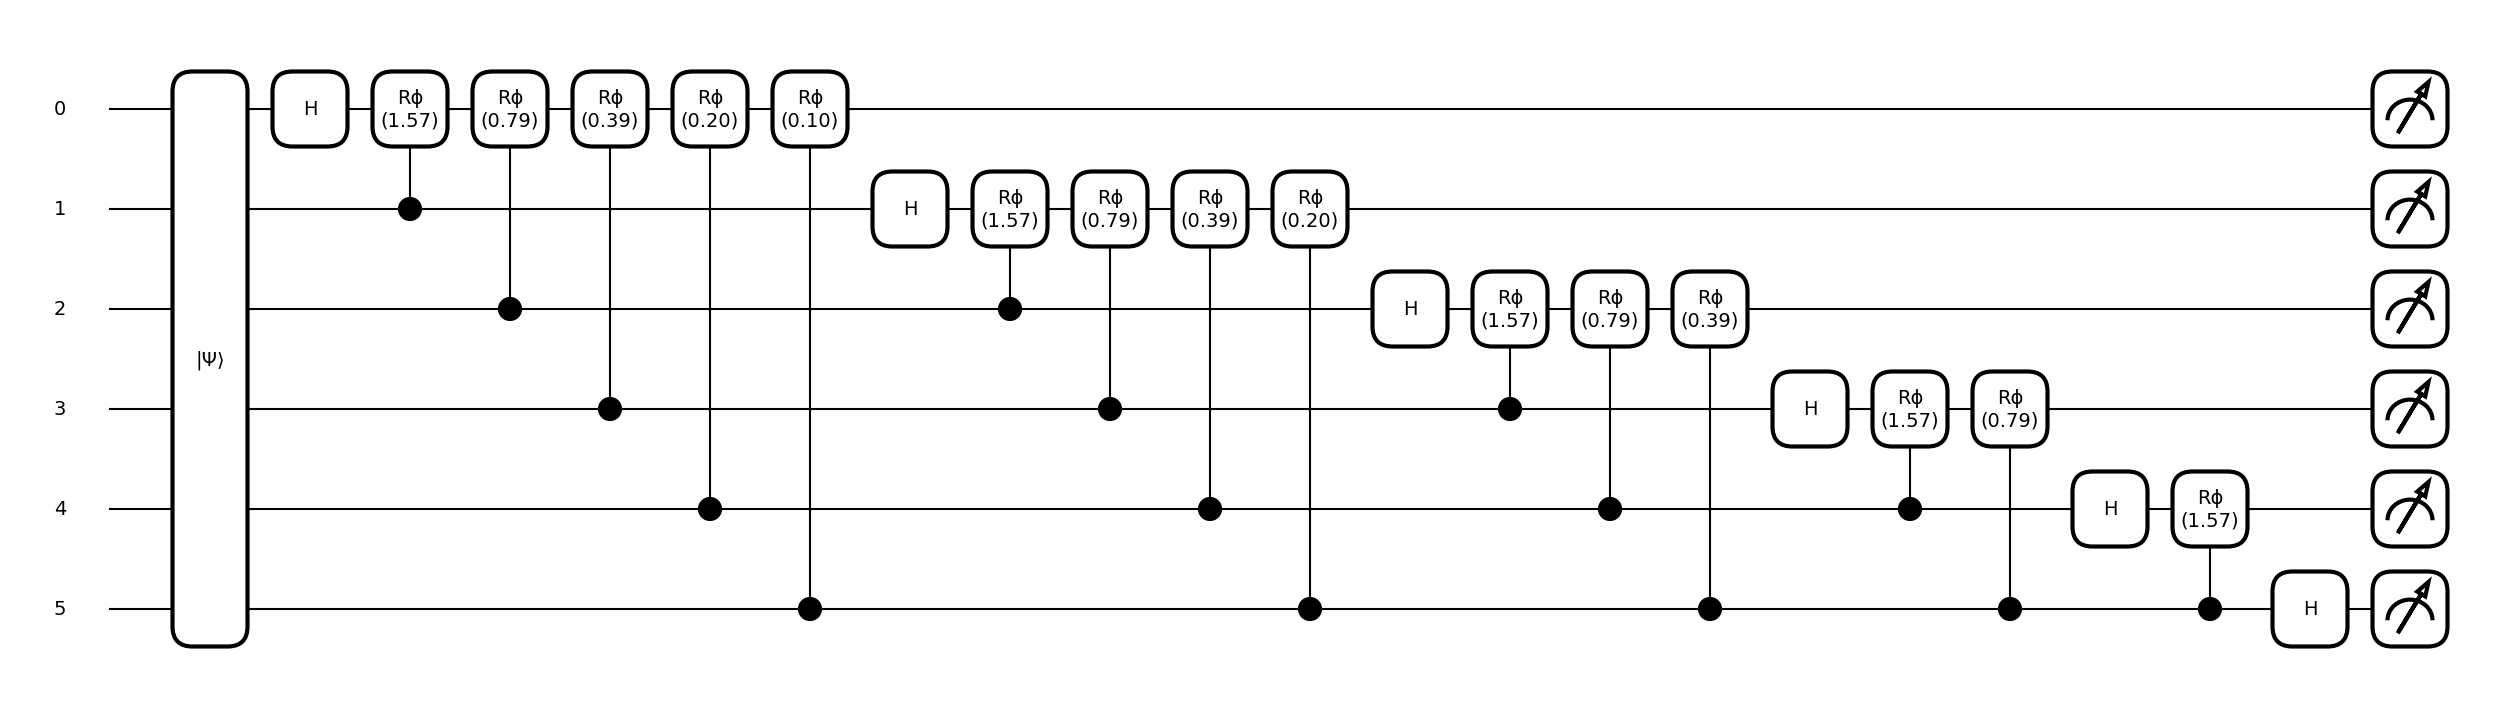

In [104]:
# Define the Quantum Fourier Transform circuit.

def qft_circuit(n_qubits):
  dev = qml.device("default.qubit", wires=n_qubits)

  @qml.qnode(dev)
  def circuit(input_vector):
    if len(input_vector) != 2**n_qubits:
      raise ValueError("Input vector length must be 2^n_qubits.")
    qml.AmplitudeEmbedding(input_vector, range(n_qubits), True)
    for k in range(n_qubits):
      qml.Hadamard(wires=k)
      for j in range(k + 1, n_qubits):
        qml.ControlledPhaseShift(pi * 2**(k - j), wires=[j, k])
    # for wire in range(n_qubits // 2):
    #   qml.SWAP(wires=[wire, n_qubits - 1 - wire])
    return qml.state()

  return circuit

# Print the circuit for 6 qubits.
n = 6
qml.draw_mpl(qft_circuit(n), decimals=2)(np.ones(2**n))

(<Figure size 2800x700 with 1 Axes>, <Axes: >)

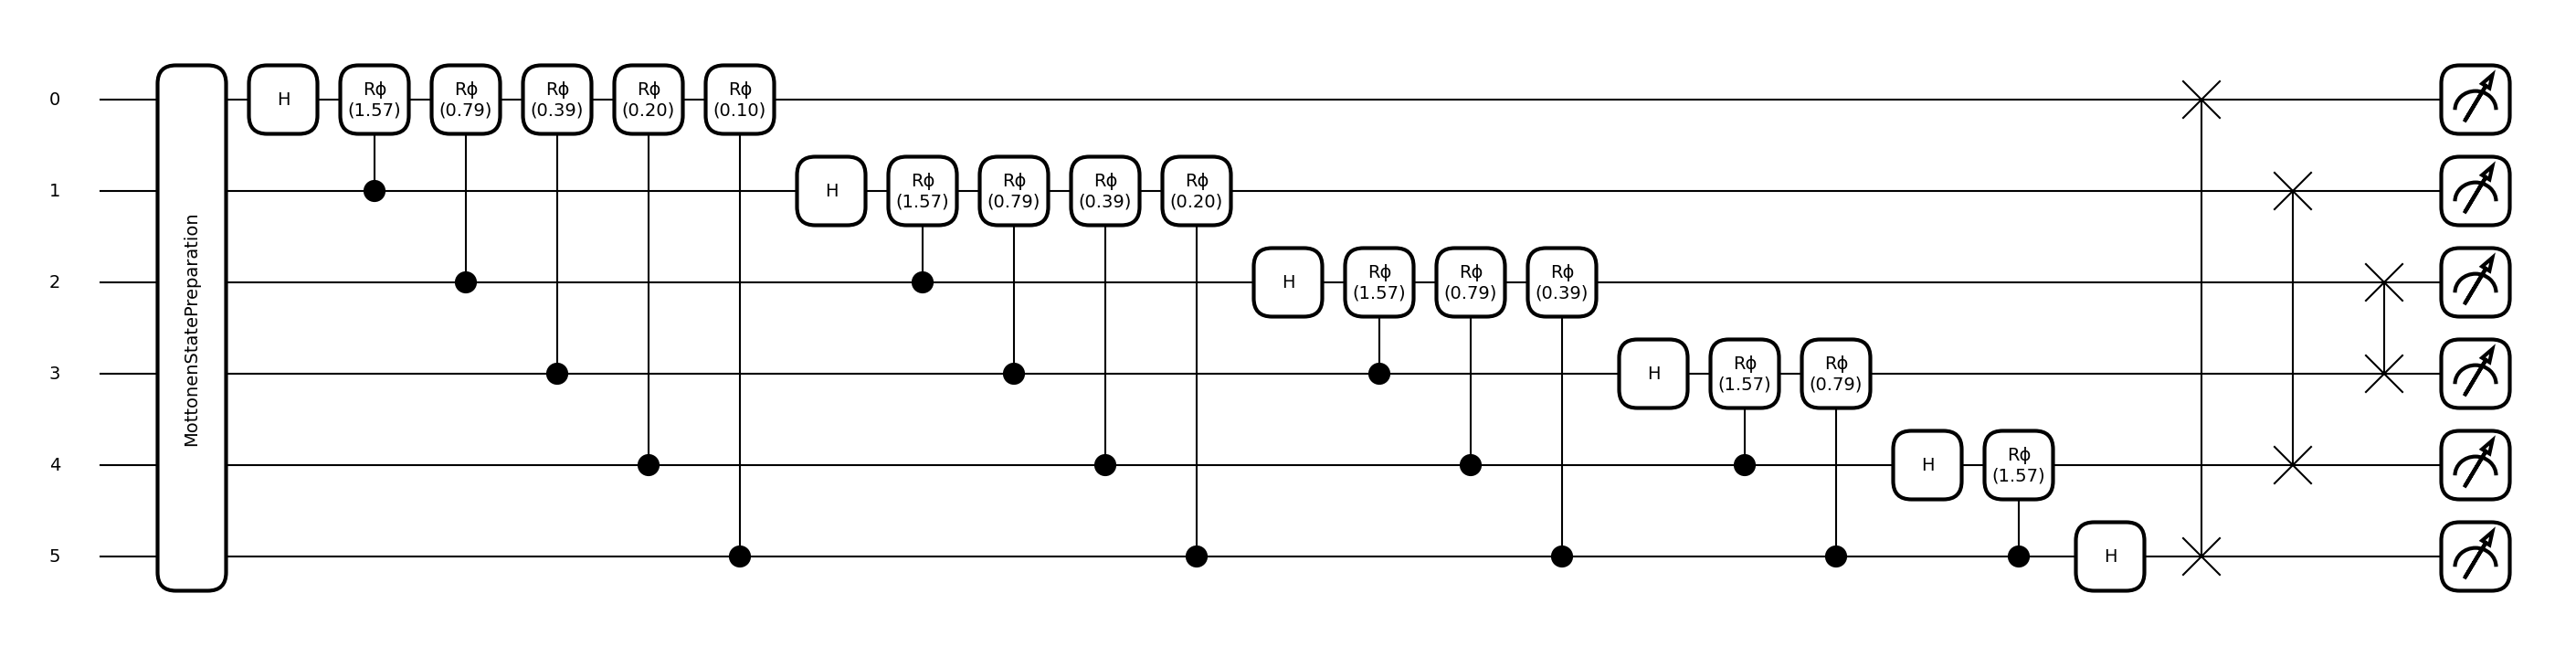

In [105]:
# Define the Quantum Fourier Transform circuit by using Pennylane's native QFT.

def pl_qft_circuit(n_qubits):
  dev = qml.device("default.qubit", wires=n_qubits)

  @qml.qnode(dev)
  def circuit(input_vector):
    if len(input_vector) != 2**n_qubits:
      raise ValueError("Input vector length must be 2^n_qubits.")
    qml.AmplitudeEmbedding(input_vector, range(n_qubits), True)
    qml.QFT(range(n_qubits))
    return qml.state()

  return circuit

# Print the circuit for 6 qubits.
n = 6
# Decompose the circuit by 1 depth to see the underlying gates for the native QFT.
qml.draw_mpl(qml.transforms.decompose(pl_qft_circuit(n), max_expansion=1), decimals=2)(np.ones(2**n))

## Excercise 3

Perform the QFT on various input vectors and compare the results with the DFT.  
Do this for 4 and 10 qubits. Use an input vector with a single non-zero element, one which is constant and one encoding a period of the function $f(t)=5+2\cos(2\pi t - \frac{\pi}{2})+3\cos(4\pi t)$.  
Plot the results for the amplitudes of the elements of wave functions after the QFT.  
Also compare the results with Pennylane's native QFT class.  
Plot the results using Matplotlib.

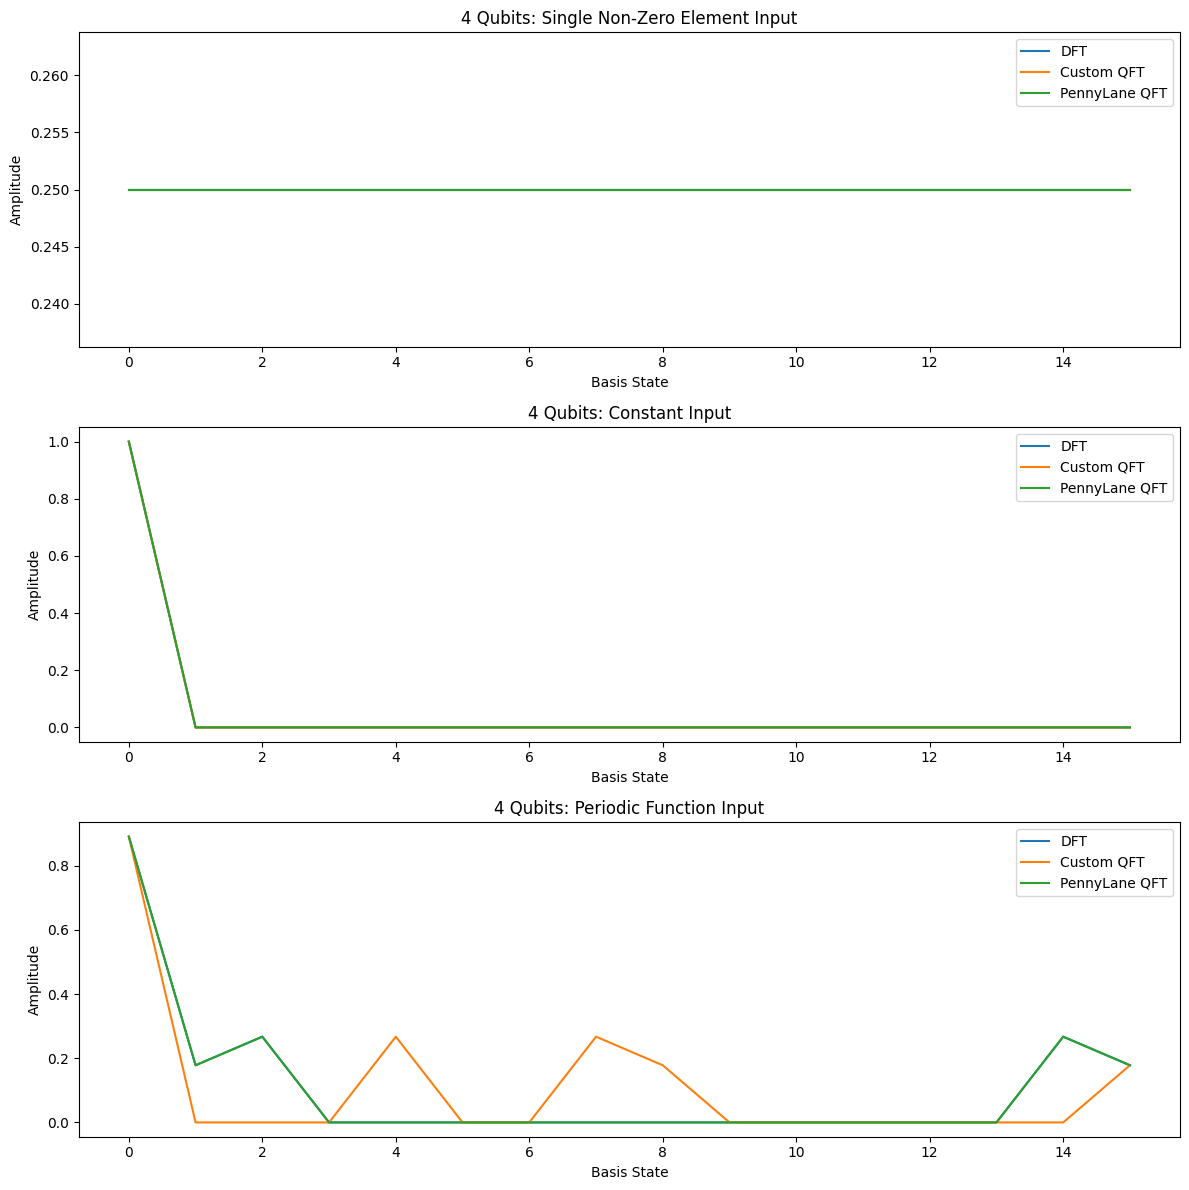

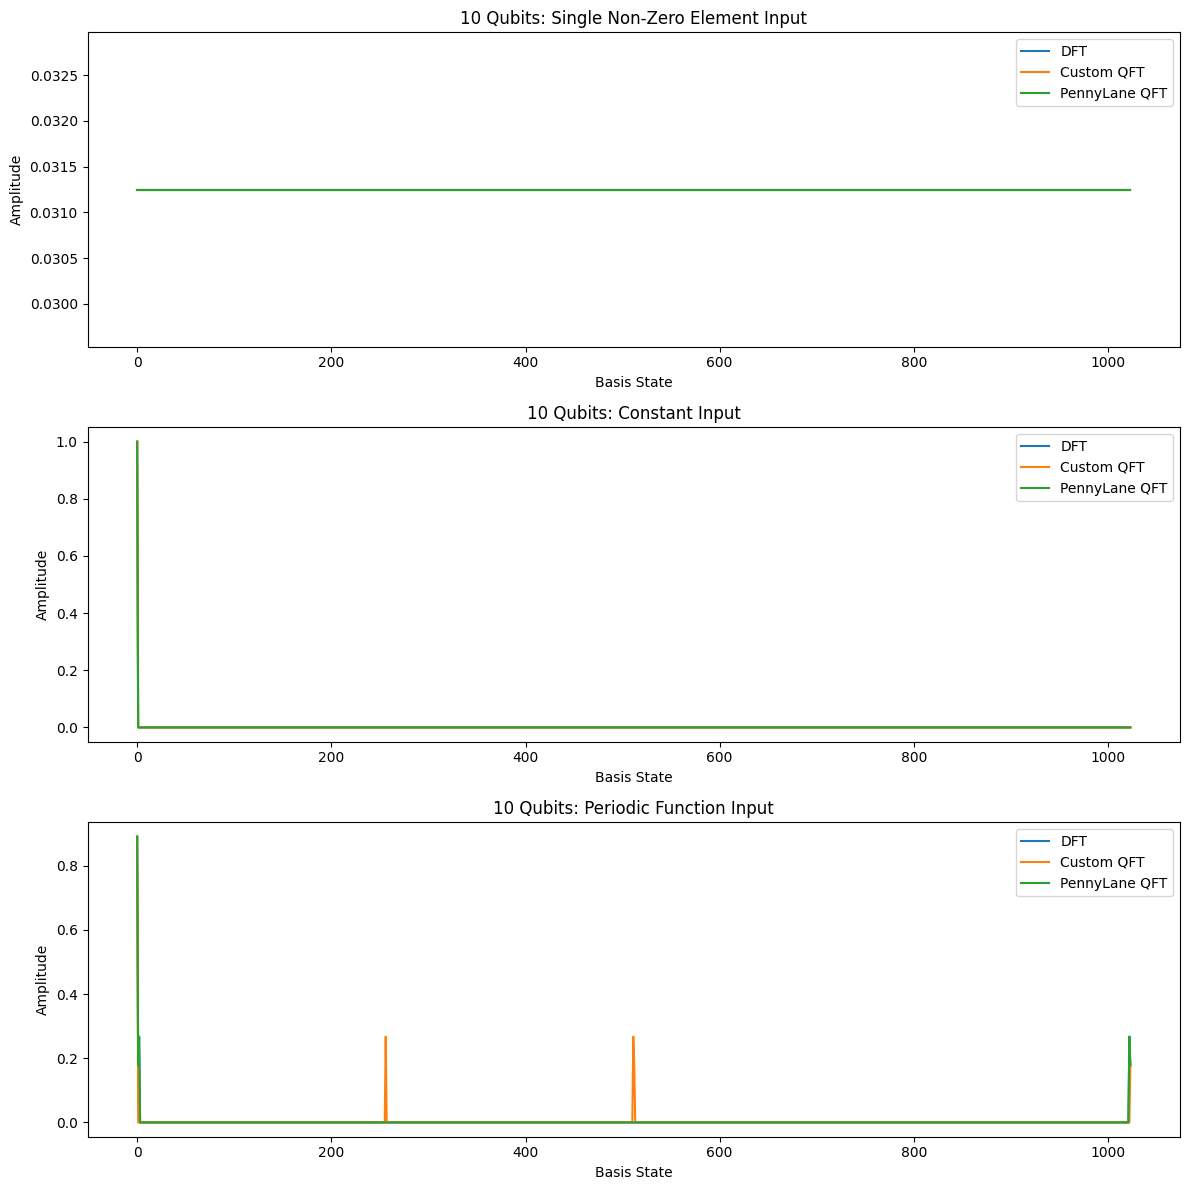


Comparison (4 Qubits):
Single Non-Zero: Custom QFT vs DFT: True
Single Non-Zero: PennyLane QFT vs DFT: True
Constant: Custom QFT vs DFT: True
Constant: PennyLane QFT vs DFT: True
Periodic: Custom QFT vs DFT: False
Periodic: PennyLane QFT vs DFT: True

Comparison (10 Qubits):
Single Non-Zero: Custom QFT vs DFT: True
Single Non-Zero: PennyLane QFT vs DFT: True
Constant: Custom QFT vs DFT: True
Constant: PennyLane QFT vs DFT: True
Periodic: Custom QFT vs DFT: False
Periodic: PennyLane QFT vs DFT: True


In [106]:
# Input vector 1: Single non-zero element.
n_qubits_4 = 4
n_qubits_10 = 10
input_single_4 = np.zeros(2**n_qubits_4)
input_single_4[0] = 1
input_single_10 = np.zeros(2**n_qubits_10)
input_single_10[0] = 1

# Input vector 2: Constant vector.
input_constant_4 = np.ones(2**n_qubits_4)
input_constant_10 = np.ones(2**n_qubits_10)

# Input vector 3: Periodic function.
def f(t):
  return 5 + 2 * np.cos(2 * pi * t - pi / 2) + 3 * np.cos(4 * pi * t)
input_periodic_4 = np.array([f(t) for t in np.arange(2**n_qubits_4) / 2**n_qubits_4])
input_periodic_10 = np.array([f(t) for t in np.arange(2**n_qubits_10) / 2**n_qubits_10])

# Create QFT circuits for 4 and 10 qubits.
qft_circ_4 = qft_circuit(n_qubits_4)
qft_circ_10 = qft_circuit(n_qubits_10)
pl_qft_circ_4 = pl_qft_circuit(n_qubits_4)
pl_qft_circ_10 = pl_qft_circuit(n_qubits_10)

# Calculate results.
results_single_dft_4 = classical_dft(input_single_4)
results_single_qft_4 = qft_circ_4(input_single_4)
results_single_pl_qft_4 = pl_qft_circ_4(input_single_4)
results_constant_dft_4 = classical_dft(input_constant_4)
results_constant_qft_4 = qft_circ_4(input_constant_4)
results_constant_pl_qft_4 = pl_qft_circ_4(input_constant_4)
results_periodic_dft_4 = classical_dft(input_periodic_4)
results_periodic_qft_4 = qft_circ_4(input_periodic_4)
results_periodic_pl_qft_4 = pl_qft_circ_4(input_periodic_4)
results_single_dft_10 = classical_dft(input_single_10)
results_single_qft_10 = qft_circ_10(input_single_10)
results_single_pl_qft_10 = pl_qft_circ_10(input_single_10)
results_constant_dft_10 = classical_dft(input_constant_10)
results_constant_qft_10 = qft_circ_10(input_constant_10)
results_constant_pl_qft_10 = pl_qft_circ_10(input_constant_10)
results_periodic_dft_10 = classical_dft(input_periodic_10)
results_periodic_qft_10 = qft_circ_10(input_periodic_10)
results_periodic_pl_qft_10 = pl_qft_circ_10(input_periodic_10)

# Plotting for 4 qubits.
fig, axes_4 = plt.subplots(3, 1, figsize=(12, 12))

# Single non-zero element.
axes_4[0].plot(np.abs(results_single_dft_4), label='DFT')
axes_4[0].plot(np.abs(results_single_qft_4), label='Custom QFT')
axes_4[0].plot(np.abs(results_single_pl_qft_4), label='PennyLane QFT')
axes_4[0].set_title('4 Qubits: Single Non-Zero Element Input')
axes_4[0].set_xlabel('Basis State')
axes_4[0].set_ylabel('Amplitude')
axes_4[0].legend()

# Constant vector.
axes_4[1].plot(np.abs(results_constant_dft_4), label='DFT')
axes_4[1].plot(np.abs(results_constant_qft_4), label='Custom QFT')
axes_4[1].plot(np.abs(results_constant_pl_qft_4), label='PennyLane QFT')
axes_4[1].set_title('4 Qubits: Constant Input')
axes_4[1].set_xlabel('Basis State')
axes_4[1].set_ylabel('Amplitude')
axes_4[1].legend()

# Periodic function.
axes_4[2].plot(np.abs(results_periodic_dft_4), label='DFT')
axes_4[2].plot(np.abs(results_periodic_qft_4), label='Custom QFT')
axes_4[2].plot(np.abs(results_periodic_pl_qft_4), label='PennyLane QFT')
axes_4[2].set_title('4 Qubits: Periodic Function Input')
axes_4[2].set_xlabel('Basis State')
axes_4[2].set_ylabel('Amplitude')
axes_4[2].legend()
plt.tight_layout()
plt.show()

# Plotting for 10 qubits.
fig, axes_10 = plt.subplots(3, 1, figsize=(12, 12))

# Single non-zero element.
axes_10[0].plot(np.abs(results_single_dft_10), label='DFT')
axes_10[0].plot(np.abs(results_single_qft_10), label='Custom QFT')
axes_10[0].plot(np.abs(results_single_pl_qft_10), label='PennyLane QFT')
axes_10[0].set_title('10 Qubits: Single Non-Zero Element Input')
axes_10[0].set_xlabel('Basis State')
axes_10[0].set_ylabel('Amplitude')
axes_10[0].legend()

# Constant vector.
axes_10[1].plot(np.abs(results_constant_dft_10), label='DFT')
axes_10[1].plot(np.abs(results_constant_qft_10), label='Custom QFT')
axes_10[1].plot(np.abs(results_constant_pl_qft_10), label='PennyLane QFT')
axes_10[1].set_title('10 Qubits: Constant Input')
axes_10[1].set_xlabel('Basis State')
axes_10[1].set_ylabel('Amplitude')
axes_10[1].legend()

# Periodic function.
axes_10[2].plot(np.abs(results_periodic_dft_10), label='DFT')
axes_10[2].plot(np.abs(results_periodic_qft_10), label='Custom QFT')
axes_10[2].plot(np.abs(results_periodic_pl_qft_10), label='PennyLane QFT')
axes_10[2].set_title('10 Qubits: Periodic Function Input')
axes_10[2].set_xlabel('Basis State')
axes_10[2].set_ylabel('Amplitude')
axes_10[2].legend()
plt.tight_layout()
plt.show()

# Compare results for correctness (4 qubits).
print("\nComparison (4 Qubits):")
print("Single Non-Zero: Custom QFT vs DFT:", np.allclose(np.abs(results_single_qft_4), np.abs(results_single_dft_4)))
print("Single Non-Zero: PennyLane QFT vs DFT:", np.allclose(np.abs(results_single_pl_qft_4), np.abs(results_single_dft_4)))
print("Constant: Custom QFT vs DFT:", np.allclose(np.abs(results_constant_qft_4), np.abs(results_constant_dft_4)))
print("Constant: PennyLane QFT vs DFT:", np.allclose(np.abs(results_constant_pl_qft_4), np.abs(results_constant_dft_4)))
print("Periodic: Custom QFT vs DFT:", np.allclose(np.abs(results_periodic_qft_4), np.abs(results_periodic_dft_4)))
print("Periodic: PennyLane QFT vs DFT:", np.allclose(np.abs(results_periodic_pl_qft_4), np.abs(results_periodic_dft_4)))

# Compare results for correctness (10 qubits).
print("\nComparison (10 Qubits):")
print("Single Non-Zero: Custom QFT vs DFT:", np.allclose(np.abs(results_single_qft_10), np.abs(results_single_dft_10)))
print("Single Non-Zero: PennyLane QFT vs DFT:", np.allclose(np.abs(results_single_pl_qft_10), np.abs(results_single_dft_10)))
print("Constant: Custom QFT vs DFT:", np.allclose(np.abs(results_constant_qft_10), np.abs(results_constant_dft_10)))
print("Constant: PennyLane QFT vs DFT:", np.allclose(np.abs(results_constant_pl_qft_10), np.abs(results_constant_dft_10)))
print("Periodic: Custom QFT vs DFT:", np.allclose(np.abs(results_periodic_qft_10), np.abs(results_periodic_dft_10)))
print("Periodic: PennyLane QFT vs DFT:", np.allclose(np.abs(results_periodic_pl_qft_10), np.abs(results_periodic_dft_10)))

## Exercise 4

Try to guess, by hand, the sequence of elementary gates needed to implement the controlled rotation. Consider that the CNOT exchanges the two last elements of the ket vector.

**Phase Shift ($P(\varphi)$)**

The *phase shift* gate does not change the probability of measuring $|0\rangle$ or $|1\rangle$, however it modifies the phase of the quantum state.  
It is expressed by the matrix

$$
P(\varphi) =
\begin{bmatrix}
1 & 0 \\
0 & \mathrm{e}^{i\varphi} \\
\end{bmatrix}
$$

and has the following effect on the 1-qubit computational basis states:

- $|0\rangle \overset{P(\varphi)}{\longmapsto} |0\rangle$

- $|1\rangle \overset{P(\varphi)}{\longmapsto} \mathrm{e}^{i\varphi}|1\rangle$

---

**Controlled NOT ($CX$)**

The *controlled not* gate, also called *controlled x* gate, acts on 2 qubits, performs the NOT operation on the second qubit only when the first qubit is $|1\rangle$, and otherwise leaves it unchanged.  
It is expressed by the matrix

$$
CX =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

and has the following effect on the 2-qubit computational basis states:

- $|00\rangle \overset{CX}{\longmapsto} |00\rangle$

- $|01\rangle \overset{CX}{\longmapsto} |01\rangle$

- $|10\rangle \overset{CX}{\longmapsto} |11\rangle$

- $|11\rangle \overset{CX}{\longmapsto} |10\rangle$

---

**Controlled Phase Shift ($CP(\varphi)$)**:

With the two gates above, we can find a way to express the *controlled phase shift* gate that acts on the 2-qubit computational basis in the following way:

- $|00\rangle \overset{CP(\varphi)}{\longmapsto} |00\rangle$

- $|01\rangle \overset{CP(\varphi)}{\longmapsto} |01\rangle$

- $|10\rangle \overset{CP(\varphi)}{\longmapsto} |10\rangle$

- $|11\rangle \overset{CP(\varphi)}{\longmapsto} \mathrm{e}^{i\varphi}|11\rangle$

The above is the result we want to obtain.  
It is trivial to see that when the first qubit, the *control* qubit, is $|0\rangle$, the second qubit is left unchanged, while only when the first qubit is $|0\rangle$ the phase shift is applied to the second qubit, the *target* qubit.

To get there, we start by first applying a *phase shift* gate of $\frac{\varphi}{2}$ to the first qubit:

- $|00\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} |00\rangle$

- $|01\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} |01\rangle$

- $|10\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} \mathrm{e}^{i\frac{\varphi}{2}}|10\rangle$

- $|11\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} \mathrm{e}^{i\frac{\varphi}{2}}|11\rangle$

We then apply the *controlled not* gate:

- $|00\rangle \overset{CX}{\longmapsto} |00\rangle$

- $|01\rangle \overset{CX}{\longmapsto} |01\rangle$

- $\mathrm{e}^{i\frac{\varphi}{2}}|10\rangle \overset{CX}{\longmapsto} \mathrm{e}^{i\frac{\varphi}{2}}|11\rangle$

- $\mathrm{e}^{i\frac{\varphi}{2}}|11\rangle \overset{CX}{\longmapsto} \mathrm{e}^{i\frac{\varphi}{2}}|10\rangle$

After, we apply another *phase shift* gate, this time with phase $-\frac{\varphi}{2}$, to the second qubit:

- $|00\rangle \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} |00\rangle$

- $|01\rangle \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} \mathrm{e}^{-i\frac{\varphi}{2}}|01\rangle$

- $\mathrm{e}^{i\frac{\varphi}{2}}|11\rangle \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} |11\rangle$

- $\mathrm{e}^{i\frac{\varphi}{2}}|10\rangle \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} \mathrm{e}^{i\frac{\varphi}{2}}|10\rangle$

Next, we apply again the *controlled not* gate:

- $|00\rangle \overset{CX}{\longmapsto} |00\rangle$

- $\mathrm{e}^{-i\frac{\varphi}{2}}|01\rangle \overset{CX}{\longmapsto} \mathrm{e}^{-i\frac{\varphi}{2}}|01\rangle$

- $|11\rangle \overset{CX}{\longmapsto} |10\rangle$

- $\mathrm{e}^{i\frac{\varphi}{2}}|10\rangle \overset{CX}{\longmapsto} \mathrm{e}^{i\frac{\varphi}{2}}|11\rangle$

Finally, to remove the unwanted phase shift from the second basis state and get the correct phase for the fourth basis state, we just have to apply a *phase shift* gate of $\frac{\varphi}{2}$ to the second qubit:

- $|00\rangle \overset{P(\frac{\varphi}{2})_1}{\longmapsto} |00\rangle$

- $\mathrm{e}^{-i\frac{\varphi}{2}}|01\rangle \overset{P(\frac{\varphi}{2})_1}{\longmapsto} |01\rangle$

- $|10\rangle \overset{P(\frac{\varphi}{2})_1}{\longmapsto} |10\rangle$

- $\mathrm{e}^{i\frac{\varphi}{2}}|11\rangle \overset{P(\frac{\varphi}{2})_1}{\longmapsto} \mathrm{e}^{i\varphi}|11\rangle$

Thus, we demonstrated that by applying that sequence of quantum gates we get an equivalent operation to the *controlled phase shift* with phase $\varphi$:

- $|00\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(\frac{\varphi}{2})_1}{\longmapsto} |00\rangle$

- $|01\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(\frac{\varphi}{2})_1}{\longmapsto} |01\rangle$

- $|10\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(\frac{\varphi}{2})_1}{\longmapsto} |10\rangle$

- $|11\rangle \overset{P(\frac{\varphi}{2})_0}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(-\frac{\varphi}{2})_1}{\longmapsto} \overset{CX}{\longmapsto} \overset{P(\frac{\varphi}{2})_1}{\longmapsto} \mathrm{e}^{i\varphi}|11\rangle$

---

One can also express the result in the matrix representation.  
A single-qubit *phase shift* gate $P(\varphi)$ remains well defined in a 2-qubit register, but its $4 \times 4$ matrix is less trivial than the $2 \times 2$ form shown earlier.

If the phase gate acts on the first qubit, the overall operation is

$$
P(\varphi)\otimes I =
\begin{pmatrix}
1 & 0 \\ 0 & e^{i\varphi}
\end{pmatrix}\!\otimes\!
\begin{pmatrix}
1 & 0 \\ 0 & 1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\varphi} & 0\\
0 & 0 & 0 & e^{i\varphi}
\end{pmatrix}
$$

Conversely, if it acts on the second qubit, we have

$$
I\otimes P(\varphi)
=
\begin{pmatrix}
1 & 0 \\ 0 & 1
\end{pmatrix}
\!\otimes\!
\begin{pmatrix}
1 & 0 \\ 0 & e^{i\varphi}
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{i\varphi} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\varphi}
\end{pmatrix}
$$

We know that the *controlled phase shift* gate has the following matrix form:

$$
CP(\varphi) =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\varphi}
\end{pmatrix}
$$

Our custom gate sequence ($CGS(\varphi)$) takes the following form:

$$
CGS(\varphi) =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\frac{\varphi}{2}} & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\frac{\varphi}{2}} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{-i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{i\frac{\varphi}{2}} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix}
$$

We can solve each matrix multiplication to get the resulting operation:

$$
\begin{aligned}
CGS(\varphi) &=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\frac{\varphi}{2}} & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\frac{\varphi}{2}} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{-i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{i\frac{\varphi}{2}} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix} \\[8pt]
&=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\frac{\varphi}{2}} & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\frac{\varphi}{2}} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{-i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{i\frac{\varphi}{2}} & 0 & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}\\
0 & 0 & 1 & 0
\end{pmatrix} \\[8pt]
&=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\frac{\varphi}{2}} & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}\\
0 & 0 & e^{-i\frac{\varphi}{2}} & 0
\end{pmatrix} \\[8pt]
&=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{i\frac{\varphi}{2}} & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & e^{-i\frac{\varphi}{2}} & 0\\
0 & 0 & 0 & e^{i\frac{\varphi}{2}}
\end{pmatrix} \\[8pt]
&=
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\varphi}
\end{pmatrix}
\end{aligned}
$$

And so we demonstrated that

$$
CGS(\varphi) =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\varphi}
\end{pmatrix} =
CP(\varphi)
$$

We can verify the correctness of our demonstrations also by comparing the outcome of applying Pennylane's predefined `ControlledPhaseShift` gate with that obtained from our custom gate sequence.

In [107]:
# Define the device we will use to compare the results.

dev = qml.device("default.qubit", wires=2)

(<Figure size 500x300 with 1 Axes>, <Axes: >)

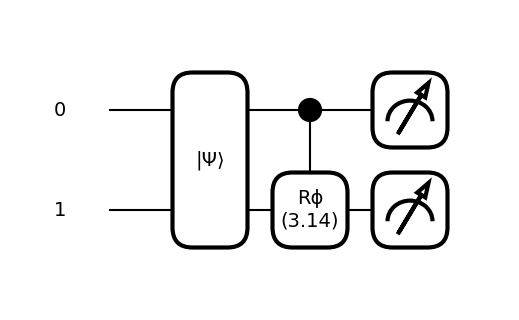

In [108]:
# Create a quantum circuit that uses Pennylane's predefined ControlledPhaseShift.

@qml.qnode(dev)
def controlled_phase_shift_circuit(input, phi):
  qml.BasisState(input, wires=[0, 1])
  qml.ControlledPhaseShift(phi, wires=[0, 1])
  return qml.state()

# Print the circuit with an example phase of pi.
qml.draw_mpl(controlled_phase_shift_circuit, decimals=2)([1, 0], pi)

(<Figure size 900x300 with 1 Axes>, <Axes: >)

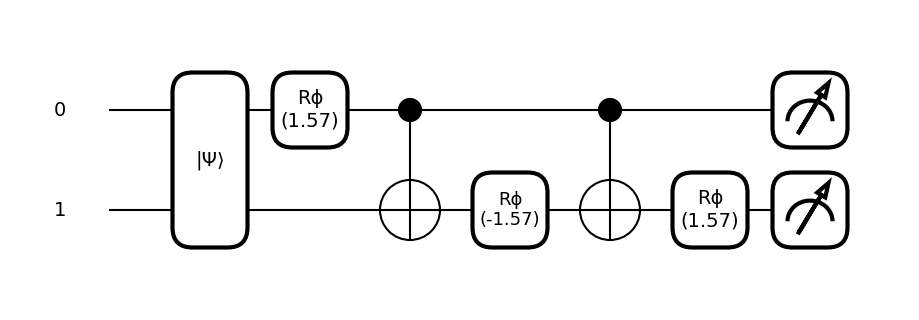

In [109]:
# Create a quantum circuit that uses our custom gate sequence.

@qml.qnode(dev)
def controlled_phase_shift_circuit_decomposed(input, phi):
  qml.BasisState(input, wires=[0, 1])
  qml.PhaseShift(phi/2, wires=0)
  qml.CNOT(wires=[0, 1])
  qml.PhaseShift(-phi/2, wires=1)
  qml.CNOT(wires=[0, 1])
  qml.PhaseShift(phi/2, wires=1)
  return qml.state()

# Print the circuit with an example phase of pi.
qml.draw_mpl(controlled_phase_shift_circuit_decomposed, decimals=2)([1, 0], pi)

In [110]:
# Compare the results for each basis state with different test phase shifts.

for phi in [0, pi/2, pi, 3*pi/2, 2*pi]:
  print(f"Phase Shift: {phi:.4f}")
  for q0 in range(2):
    for q1 in range(2):
      print(f"Basis State |{q0}{q1}⟩: {np.allclose(controlled_phase_shift_circuit([q0, q1], pi), controlled_phase_shift_circuit_decomposed([q0, q1], pi))}")

Phase Shift: 0.0000
Basis State |00⟩: True
Basis State |01⟩: True
Basis State |10⟩: True
Basis State |11⟩: True
Phase Shift: 1.5708
Basis State |00⟩: True
Basis State |01⟩: True
Basis State |10⟩: True
Basis State |11⟩: True
Phase Shift: 3.1416
Basis State |00⟩: True
Basis State |01⟩: True
Basis State |10⟩: True
Basis State |11⟩: True
Phase Shift: 4.7124
Basis State |00⟩: True
Basis State |01⟩: True
Basis State |10⟩: True
Basis State |11⟩: True
Phase Shift: 6.2832
Basis State |00⟩: True
Basis State |01⟩: True
Basis State |10⟩: True
Basis State |11⟩: True
